# Practical-01 Implementation the classification of MNIST Dataset using CNN

## Introduction To MNIST Dataset

### The MNIST (Modified National Institute of Standards and Technology) dataset is a well-known and extensively used benchmark in the field of machine learning, specifically for image classification tasks. It consists of grayscale images of handwritten digits, ranging from 0 to 9, with each image having a size of 28x28 pixels. The dataset includes 60,000 training images and 10,000 test images, providing a balanced set for developing and evaluating classification models. Each image in the MNIST dataset is represented as a 28x28 grid of pixel values, where each pixel value is a grayscale intensity ranging from 0 (black) to 255 (white). Since each image is small and monochrome, it offers a simplified task for classification algorithms while still being complex enough to serve as a challenging problem. Each image is associated with a label, which indicates the digit (from 0 to 9) represented by the image. The task for a classifier is to correctly predict the label for a given image.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras
from tensorflow.keras.utils import  plot_model

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [4]:
# Add a new axis
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

In [5]:
#encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
#data standarization
x_train = x_train / 255.0
x_test = x_test / 255.0

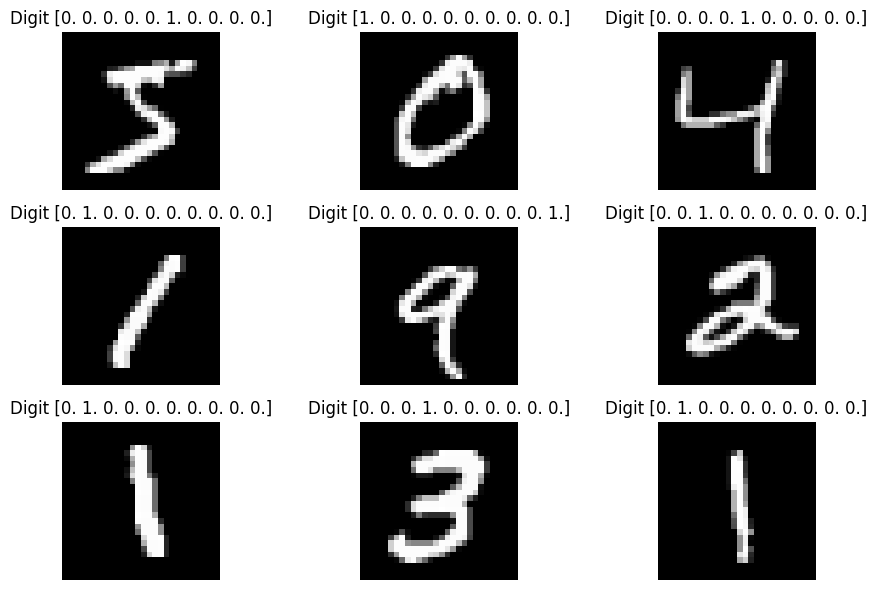

In [7]:
#data visualization
plt.figure(figsize=(10, 6))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
  plt.title('Digit {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

In [8]:
#training model
model = Sequential()
# Layer 1 Conv2D
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=x_train[0].shape, padding="same"))
# Layer 2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# Layer 3 Conv2D
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# Layer 4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Dense(units=120, activation='tanh'))
model.add(Dense(units=84, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))


model.compile(optimizer='adam',loss=categorical_crossentropy,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [9]:
model.fit(x_train, y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2357 - accuracy: 0.9295
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0926 - accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0637 - accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0499 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0389 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0326 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0239 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0211 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [10]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test),axis=1),labels=list(np.arange(0,10)))

313/313 [==============================] - 2s 5ms/step


Text(0.5, 58.7222222222222, 'Predicted label')

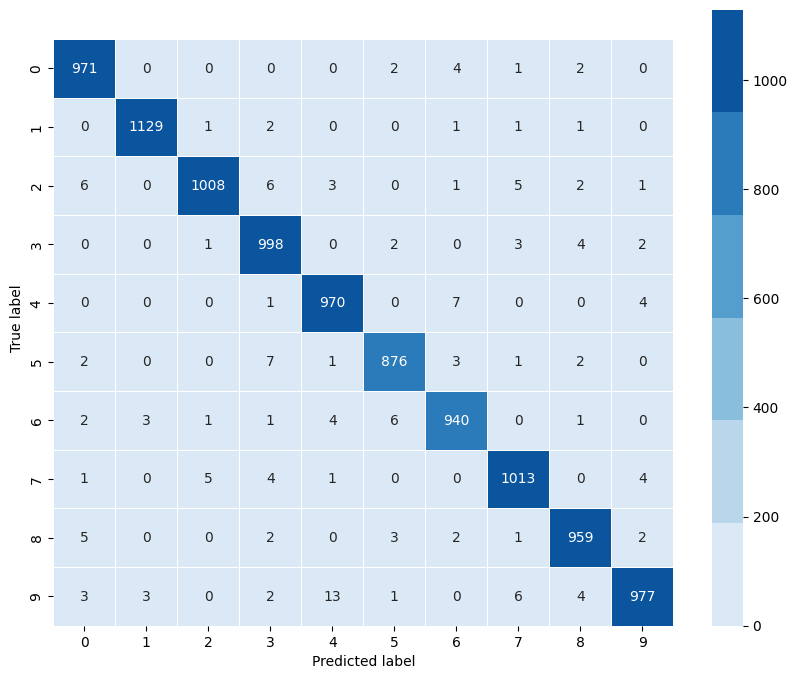

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(confusion, annot=True,ax=ax,fmt="d",linewidths=.5,cmap=sns.color_palette("Blues"));
plt.ylim([ 10,-0.5,]);
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [12]:
from sklearn.metrics import classification_report
target_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]
print(classification_report(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test),axis=1), target_names=target_names))
report = classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test), axis=1), target_names=target_names, output_dict=True)

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.99      0.98      0.98      1032
     Class 3       0.98      0.99      0.98      1010
     Class 4       0.98      0.99      0.98       982
     Class 5       0.98      0.98      0.98       892
     Class 6       0.98      0.98      0.98       958
     Class 7       0.98      0.99      0.98      1028
     Class 8       0.98      0.98      0.98       974
     Class 9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

313/313 [==============================] - 2s 5ms/step


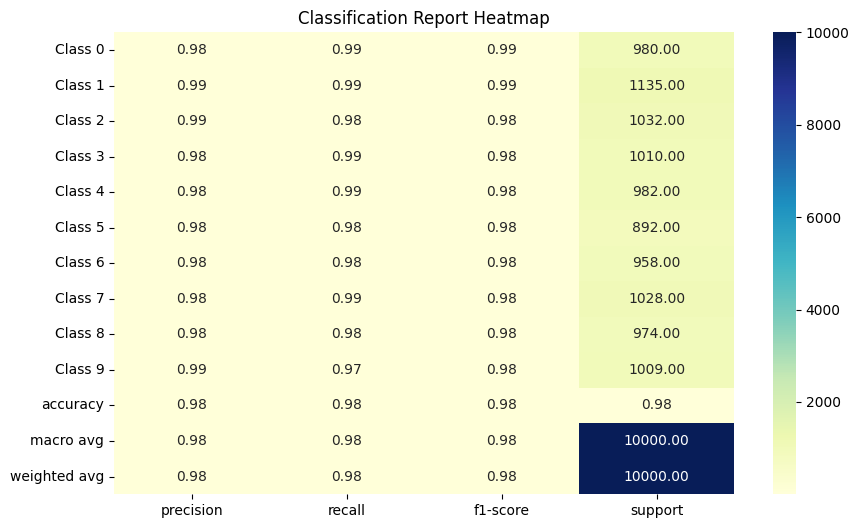

In [13]:
report_data = report
report_df = pd.DataFrame(report_data).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

## Conclusion

### we trained LeNet architecture on MNIST dataset after applying labels encoding and data standaraization as preprocessing for data. we trained 2 layers of cnn2D and 2 layers from average poling and used adam optimizer and used tanh as activation function in two layers and softmax as last layer activation function we get accuracy 0.99